## Problem Statement
### Predict The Flight Ticket Price 
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

In [1]:
# Importing libarieries 
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Read the data
train = pd.read_csv('Data_Train.csv')
test = pd.read_csv('Test_set.csv')

# EDA

In [3]:
# Display train 
display(train.head())
display(train.shape)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


(10683, 11)

In [4]:
# Display test
display(test.head())
display(test.shape)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


(2671, 10)

In [5]:
# Combining the data
df = train.append(test)
display(df.head())
display(df.shape)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


(13354, 11)

In [6]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [7]:
# Summary Statistics
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
df.describe(include = ['O'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,13354,13354,13354,13354,13353,13354,13354,13354,13353,13354
unique,12,44,5,6,132,223,1451,374,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,4746,633,5682,5682,3000,288,536,672,7056,10493


In [9]:
# Check the missing values 
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [10]:
# Treating missing values 
df = df.dropna(axis=0, how='any')
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

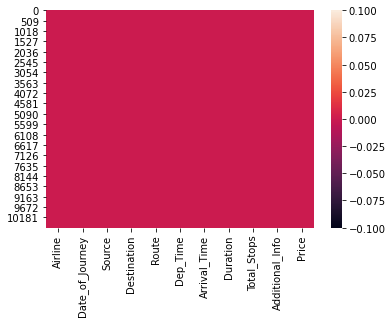

In [11]:
# Check the visualization wheather missing values is removed or not 
sns.heatmap(df.isnull())

''' No Missing values are present in dataset '''

In [12]:
print(df['Source'].unique())
df['Destination'].unique()

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [13]:
df.sort_values('Date_of_Journey', inplace = True)

In [14]:
df['year'] = pd.DatetimeIndex(df['Date_of_Journey']).year
df['month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
df['day'] = pd.DatetimeIndex(df['Date_of_Journey']).day

In [15]:
df['Additional_Info'].unique()

array(['No info', 'Change airports', 'Business class', '1 Long layover',
       'Red-eye flight', 'No Info', '1 Short layover', '2 Long layover',
       'In-flight meal not included', 'No check-in baggage included'],
      dtype=object)

# Data Visualization

In [16]:
# Scatter plot - Visualization of Price vs Additinal information 

Text(0, 0.5, 'Price of ticket')

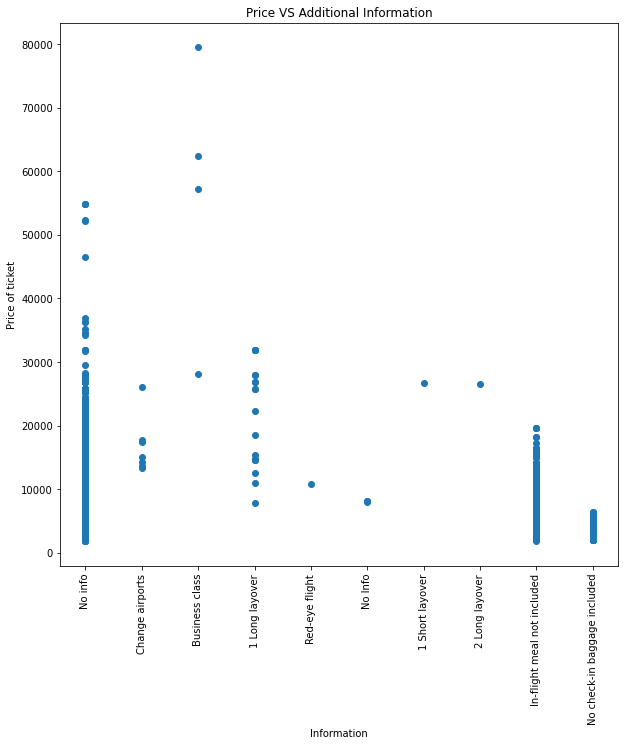

In [17]:
plt.figure(figsize = (10, 10))
plt.title('Price VS Additional Information')
plt.scatter(df['Additional_Info'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')

'''From above scatter plot we can say that the ticket prices for Business class is higher.''' 

In [18]:
# Visualizaton of highest count of flights month wise

Text(0, 0.5, 'Count of flights')

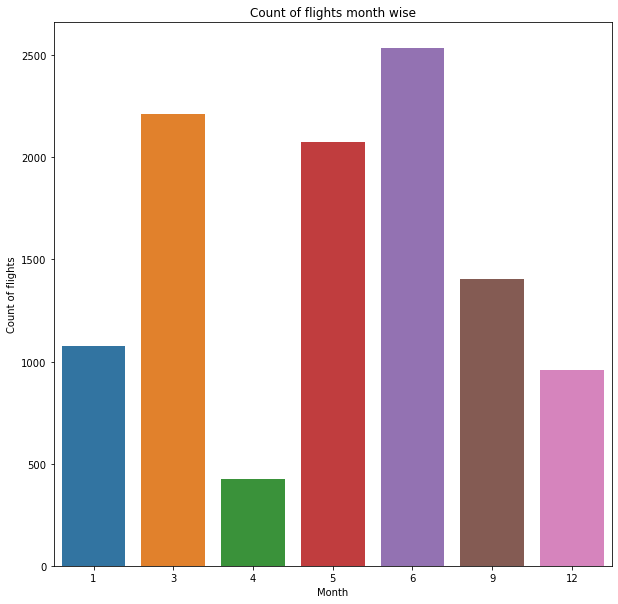

In [19]:
plt.figure(figsize = (10 , 10))
plt.title('Count of flights month wise')
sns.countplot(x = 'month', data = df)
plt.xlabel('Month')
plt.ylabel('Count of flights')

''' There are around 2500 flights scheduled in the month of may so at this time can be the peak month for the airlines as compared to april which seems like slack season for airlines.'''

In [20]:
# Prie of ticket vs Airline

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

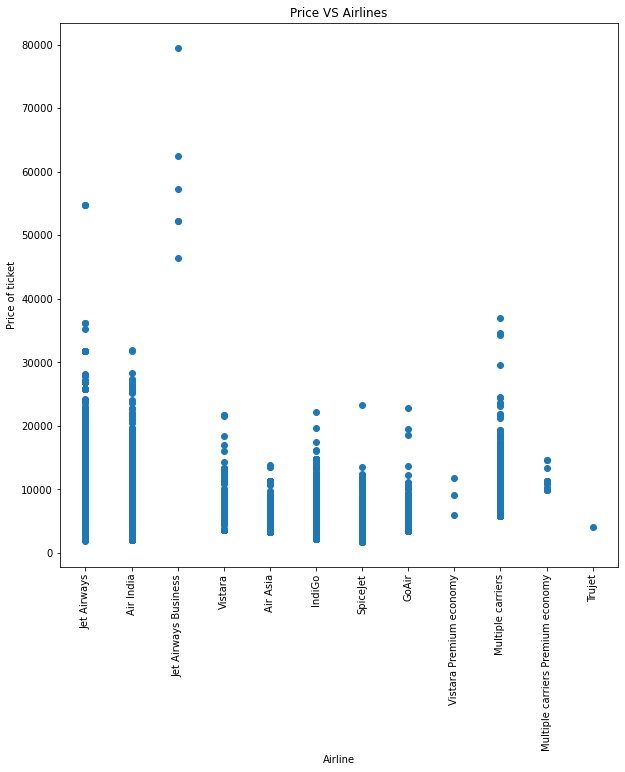

In [21]:
plt.figure(figsize = (10, 10))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

'''The ticket rate for Jet Airways Business airline was high.'''

In [22]:
df['Airline'].replace(['Trujet', 'Vistara Premium economy'], 'Another', inplace = True)

In [23]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day


In [24]:
def convert_into_stops(X):
    if X == '4 stops':
        return 4
    elif X == '3 stops':
        return 3
    elif X == '2 stops':
        return 2
    elif X == '1 stop':
        return 1
    elif X == 'non stop':
        return 0

In [25]:
df['Total_Stops'] = df['Total_Stops'].map(convert_into_stops)

In [26]:
df.fillna(0, inplace  = True)
df['Total_Stops'] = df['Total_Stops'].apply(lambda x : int(x))

In [27]:
# Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening
def flight_dep_time(X):
    '''
    This function takes the flight Departure time 
    and convert into appropriate format.
    '''
    if int(X[:2]) >= 0 and int(X[:2]) < 6:
        return 'mid_night'
    elif int(X[:2]) >= 6 and int(X[:2]) < 12:
        return 'morning'
    elif int(X[:2]) >= 12 and int(X[:2]) < 18:
        return 'afternoon'
    elif int(X[:2]) >= 18 and int(X[:2]) < 24:
        return 'evening'

In [28]:
df['flight_time'] = df['Dep_Time'].apply(flight_dep_time)

In [29]:
# Converting the flight duration into seconds

def convert_into_seconds(X):
    '''
    This function takes the total time of flight from
    one city to another and converts it into the seconds.
    '''
    a = [int(s) for s in re.findall(r'-?\d+\.?\d*', X)]
    if len(a) == 2:
        hr = a[0] * 3600
        min = a[1] * 60
    else:
        hr = a[0] * 3600
        min = 0   
    total = hr + min
    return total

df['Duration(sec)'] = df['Duration'].map(convert_into_seconds)

Text(0, 0.5, 'Price of ticket')

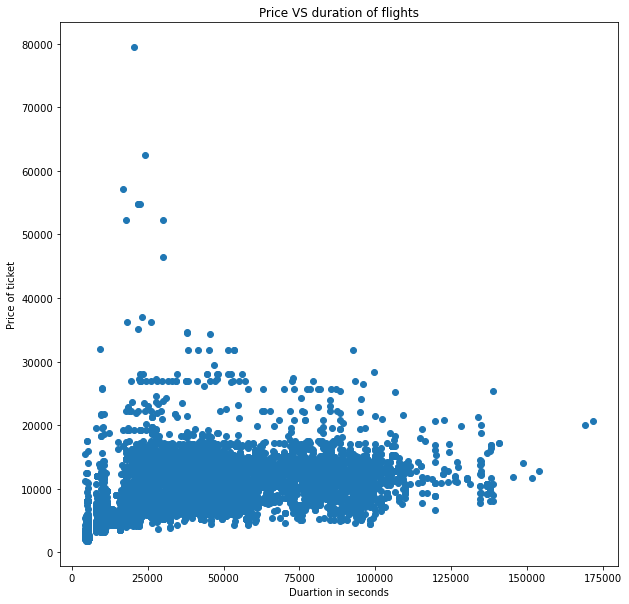

In [30]:
plt.figure(figsize = (10, 10))
plt.title('Price VS duration of flights')
plt.scatter(df['Duration(sec)'], df['Price'])
plt.xlabel('Duartion in seconds')
plt.ylabel('Price of ticket')

# Correlation

In [31]:
df.corr()

,Total_Stops,Price,year,month,day,Duration(sec)
Total_Stops,1.000000,0.603897,NaN,0.065495,-0.024136,0.738204
Price,0.603897,1.000000,NaN,0.010705,-0.165448,0.506604
year,NaN,NaN,NaN,NaN,NaN,NaN
month,0.065495,0.010705,NaN,1.000000,-0.264896,0.055147
day,-0.024136,-0.165448,NaN,-0.264896,1.000000,-0.038422
Duration(sec),0.738204,0.506604,NaN,0.055147,-0.038422,1.000000


In [32]:
# Drop the duplicate rwos 

In [33]:
df.shape

(10682, 16)

In [34]:
df = df.drop_duplicates()
df.shape

(10462, 16)

In [35]:
df['Additional_Info'].unique()

array(['No info', 'Change airports', 'Business class', '1 Long layover',
       'Red-eye flight', 'No Info', '1 Short layover', '2 Long layover',
       'In-flight meal not included', 'No check-in baggage included'],
      dtype=object)

'No info' is same as 'No Info'. So replacing them with single common label.'

In [36]:
df['Additional_Info'].replace('No Info', 'No info', inplace = True)

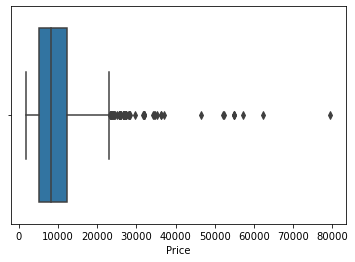

In [37]:
# Check the outlier 
sns.boxplot(df['Price'])

In [38]:
# Encoding the dummy varibales (for categorical features).

In [39]:
df = pd.get_dummies(df, columns = ['Airline', 'Source', 'Destination', 'Additional_Info', 'flight_time'])

In [40]:
df.head(10)

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,year,month,day,...,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,flight_time_afternoon,flight_time_evening,flight_time_mid_night,flight_time_morning
1918,01/03/2019,BLR → BOM → DEL,16:55,08:15 02 Mar,15h 20m,1,26890.0,2019,1,3,...,0,0,0,0,1,0,1,0,0,0
7902,01/03/2019,BLR → BOM → DEL,16:55,00:45 02 Mar,7h 50m,1,26890.0,2019,1,3,...,0,0,0,0,1,0,1,0,0,0
8897,01/03/2019,BLR → CCU → GAU → DEL,11:05,22:10,11h 5m,2,13576.0,2019,1,3,...,0,1,0,0,0,0,0,0,0,1
9546,01/03/2019,BLR → DEL,13:20,16:10,2h 50m,0,12526.0,2019,1,3,...,0,0,0,0,1,0,1,0,0,0
9182,01/03/2019,BLR → CCU → BBI → HYD → VGA → DEL,05:50,11:20 02 Mar,29h 30m,4,17686.0,2019,1,3,...,0,1,0,0,0,0,0,0,1,0
1665,01/03/2019,BLR → CCU → BBI → HYD → DEL,05:50,12:15 02 Mar,30h 25m,3,12346.0,2019,1,3,...,0,0,0,0,1,0,0,0,1,0
353,01/03/2019,BLR → CCU → DEL,11:05,09:15 02 Mar,22h 10m,1,13439.0,2019,1,3,...,0,0,0,0,1,0,0,0,0,1
826,01/03/2019,BLR → BOM → DEL,05:45,16:10,10h 25m,1,26890.0,2019,1,3,...,0,0,0,0,1,0,0,0,1,0
9479,01/03/2019,BLR → CCU → BBI → DEL,05:50,16:20,10h 30m,2,15119.0,2019,1,3,...,0,1,0,0,0,0,0,0,1,0
1466,01/03/2019,BLR → BOM → DEL,11:40,09:30 02 Mar,21h 50m,1,25735.0,2019,1,3,...,0,0,0,0,1,0,0,0,0,1


In [41]:
# Removing the unused features
df.drop(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration'], axis = 1, inplace = True)

In [42]:
# Saving the final dataframe to directory.
df.to_csv('flight_data.csv', index = None)

# Model Building 

In [43]:
# Importing for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [44]:
X = df.drop('Price', axis = 1)
y = df['Price']

In [45]:
# Standard Scaler
s = StandardScaler()
X = s.fit_transform(X)

In [46]:
# Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=42)

In [47]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (8369, 40)
The size of training output is (8369,)
**************************************************
The size of testing input is (2093, 40)
The size of testing output is (2093,)


# Machine Learning Models

# Ridge Regression

In [48]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(X_train ,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [49]:
print(ridge_regressor.best_estimator_)
ridge_regressor.best_params_

Ridge(alpha=100)


{'alpha': 100}

In [50]:
#Predict train result and test result 
y_train_pred =ridge_regressor.predict(X_train) 
y_test_pred =ridge_regressor.predict(X_test)

In [51]:
print("Train Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  2586.4634453207273
R-squared:  0.6878067562591585


In [52]:
print("Test Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  2615.7697289872413
R-squared:  0.6775666780561017


# KNN Regressor

In [53]:
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv = 10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='neg_mean_squared_error')

In [54]:
print(knn_regressor.best_estimator_)
knn_regressor.best_params_

KNeighborsRegressor(n_neighbors=4)


{'n_neighbors': 4}

In [55]:
y_train_pred =knn_regressor.predict(X_train)
y_test_pred =knn_regressor.predict(X_test) 

In [56]:
print("Train Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  1660.150430914327
R-squared:  0.8713808321748757


In [57]:
print("Test Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  2202.6578520245225
R-squared:  0.7713690706034471


# Descision Tree Regressor 

In [58]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [59]:
print(tree.best_estimator_)
tree.best_params_

DecisionTreeRegressor(max_depth=13)


{'max_depth': 13}

In [60]:
#Predict train result and test result
y_train_pred =tree.predict(X_train) 
y_test_pred =tree.predict(X_test)

In [61]:
print("Train Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  1123.995159378357
R-squared:  0.9410424141322961


In [62]:
print("Test Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  1899.2726276000071
R-squared:  0.8300130753067361


# Random Forest Regressor

In [63]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error')

In [64]:
print(random_regressor.best_estimator_)
random_regressor.best_params_

RandomForestRegressor(n_estimators=500)


{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1}

In [65]:
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

In [66]:
print("Train Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  729.59517910237
R-squared:  0.9751586770028828


In [67]:
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  1602.3409178394809
R-squared:  0.8790096467487047


# XGBoost Regressor

In [68]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [69]:
print(model.best_estimator_)
model.best_params_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


{'reg_lambda': 1.0, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.1}

In [70]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [71]:
print("Train Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  1169.3870751779573
R-squared:  0.9361843217717681


In [72]:
print("Test Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  1621.9726040502571
R-squared:  0.8760267668542221


# Conclusion 
From above observation we have seen RandomForest Rgressor, KNN Regressor, DecisionTree Regressor, XGboost Regressor and Ridge Regression ,I conclude that Random Forest is best and second XGboost.

In [73]:
# Save the model for further purpose 
import joblib
joblib.dump(random_regressor,'flight_price.pkl')

['flight_price.pkl']